<span style="font-family: Arial; font-weight:bold;font-size:3em;color:#0e92ea;">  Project - Supervised Learning

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;"> Name: Panagam Mohitha

**Domain:** Banking

**Context:** This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability 
customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last 
year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail 
marketing department to devise campaigns with better target marketing to increase the success ratio with 
minimal budget. 

**Data Description:** The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, 
income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer 
response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) 
accepted the personal loan that was offered to them in the earlier campaign.


**Attribute Information:** 
* **ID** : Customer ID 
* **Age** : Customer's age in completed years
* **Experience** : #years of professional experience
* **Income** : Annual income of the customer 
* **ZIP Code** : Home Address ZIP code.
* **Family** : Family size of the customer
* **CCAvg** : Avg. spending on credit cards per month 
* **Education** : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* **Mortgage** : Value of house mortgage if any. 
* **Personal Loan** : Did this customer accept the personal loan offered in the last campaign?
* **Securities Account** : Does the customer have a securities account with the bank?
* **CD Account** : Does the customer have a certificate of deposit (CD) account with the bank?
* **Online** : Does the customer use internet banking facilities?
* **Credit card** : Does the customer use a credit card issued by UniversalBank


**Objective:** We will implement Classification algorithms to differentiate people who will buy loans vs the who will not.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  1. Read the column description and ensure you understand each attribute well 


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> Importing the library:

In [459]:
import warnings
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
import math as m
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [460]:
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> Read data as Data frame:

In [461]:
cust_data = pd.read_csv('C:\\Users\\Mohitha Panagam\\Downloads\\Project\\Bank_Personal_Loan_Modelling.csv')

In [462]:
cust_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> Shape of the data

In [463]:
cust_data.shape

(5000, 14)

 **Inference:** 
 * There are 5000 Observations / Rows and 14 Attributes / Columns.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> Data type of each attribute 

In [464]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


 **Inference:** 
 * Except CCAvg other attributes are integers.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> 5 point summary of attributes

In [465]:
cust_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000
mean,2500.50000,45.33840,20.10460,73.77420,93152.50300,2.39640,1.93794,1.88100,56.49880,0.09600,0.10440,0.06040,0.59680,0.29400
std,1443.52000,11.46317,11.46795,46.03373,2121.85220,1.14766,1.74766,0.83987,101.71380,0.29462,0.30581,0.23825,0.49059,0.45564
min,1.00000,23.00000,-3.00000,8.00000,9307.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1250.75000,35.00000,10.00000,39.00000,91911.00000,1.00000,0.70000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,2500.50000,45.00000,20.00000,64.00000,93437.00000,2.00000,1.50000,2.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
75%,3750.25000,55.00000,30.00000,98.00000,94608.00000,3.00000,2.50000,3.00000,101.00000,0.00000,0.00000,0.00000,1.00000,1.00000
max,5000.00000,67.00000,43.00000,224.00000,96651.00000,4.00000,10.00000,3.00000,635.00000,1.00000,1.00000,1.00000,1.00000,1.00000


 **Inference:** 
 * It is observed that the minimum value of Experience in negative value which is not possible. 
 * Assuming the minus symbol as error in data entry.

In [466]:
cust_data['Experience'] = cust_data['Experience'].abs()
cust_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.00000,2500.50000,1443.52000,1.00000,1250.75000,2500.50000,3750.25000,5000.00000
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.13460,11.41519,0.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
ZIP Code,5000.00000,93152.50300,2121.85220,9307.00000,91911.00000,93437.00000,94608.00000,96651.00000
Family,5000.00000,2.39640,1.14766,1.00000,1.00000,2.00000,3.00000,4.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Education,5000.00000,1.88100,0.83987,1.00000,1.00000,2.00000,3.00000,3.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000
Personal_Loan,5000.00000,0.09600,0.29462,0.00000,0.00000,0.00000,0.00000,1.00000


 **Inference:** 
 * Using abs() function to make all the negative values of the experience into positive values therefore the minimum value of experience has corrected to zero.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;">  Checking the presence of missing values 

In [467]:
missing_values = cust_data.isnull().sum()

print(missing_values)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


**Inference:**
* 'isnull' function used to check missing values in dataframe.
* No missing and null value present in the dataframe.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;">  Checking the unique values 

In [468]:
cust_data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

**Inference:**
* It is observed that last 5 attributes have 2 unique values (0 and 1)
* Education attribute have 3 unique values (1: Undergrad; 2: Graduate; 3: Advanced/Professional)

In [469]:
# Customer 'ID' is not required for further analysis. Therefore, it is removed.
cols_to_drop = ['ID']
cust_data = cust_data.drop(cols_to_drop, axis=1)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  2. Perform univariate analysis of each and every attribute - use an appropriate plot for a given attribute and mention your insights

In [470]:
cust_data[cust_data['Mortgage']==0].shape[0]

3462

**Inference:**
* There are more than half customers with no mortgage.
* The count of people having home mortgage as zero is 3462 which is like most of the people do not have mortgage.

<AxesSubplot:xlabel='Online', ylabel='count'>

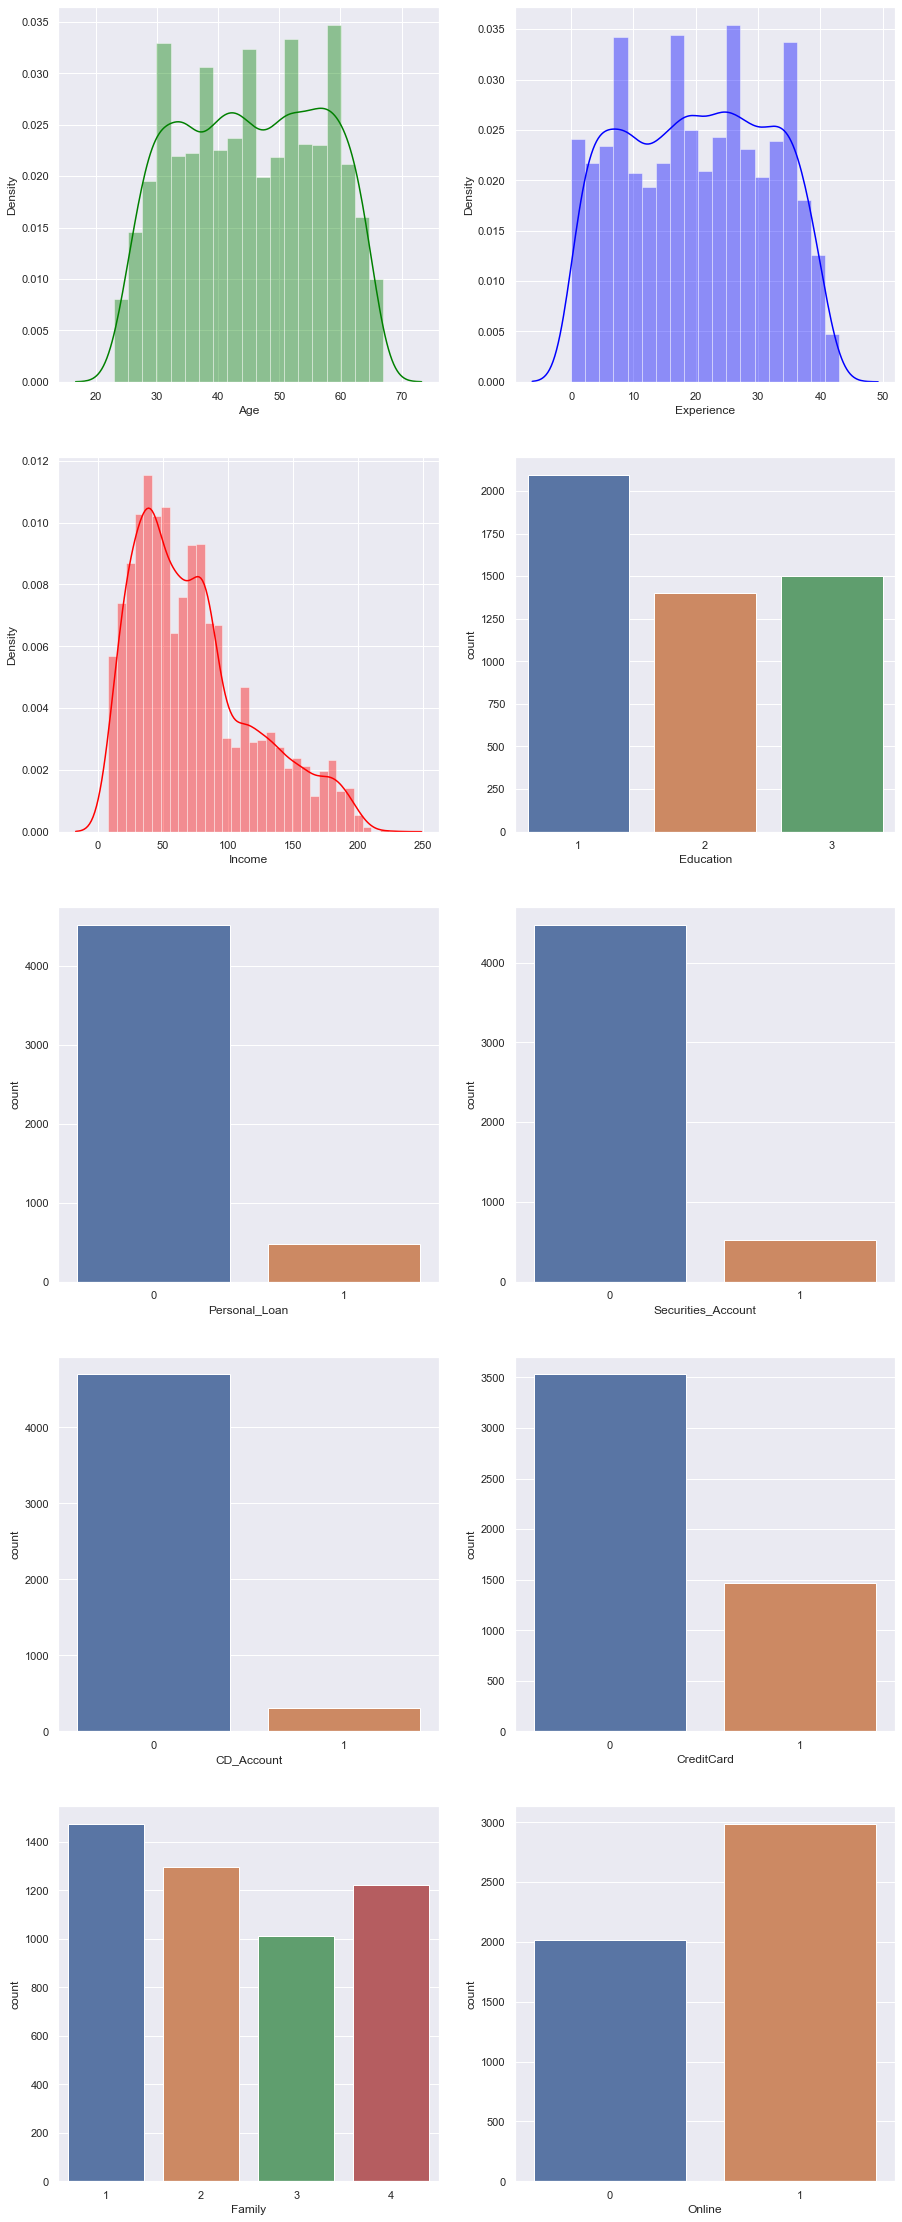

In [471]:
sns.set()
fig, axes = plt.subplots(5, 2, figsize=(15, 40))
sns.distplot(cust_data['Age'], color='green', ax=axes[0,0])
sns.distplot(cust_data['Experience'],color='blue', ax=axes[0,1])
sns.distplot(cust_data['Income'], color='red',ax=axes[1,0])
sns.countplot(cust_data['Education'], ax=axes[1,1])
sns.countplot(cust_data['Personal_Loan'], ax=axes[2,0])
sns.countplot(cust_data['Securities_Account'],ax=axes[2,1])
sns.countplot(cust_data['CD_Account'], ax=axes[3,0])
sns.countplot(cust_data['CreditCard'], ax=axes[3,1])
sns.countplot(cust_data['Family'], ax=axes[4,0])
sns.countplot(cust_data['Online'], ax=axes[4,1])

**Inference:**
* The distribution of each attribute is found.
* It is found in the income distribution plot that it is left-skewed.
* The distribution plot of age and experience is evenly distributed.
* Regarding Education level of customers, Undergrads has major share. 
* Graduates and Advanced/Professional has almost equal share but less than undergrads.
* People taking personal loans are very less.
* People prefer online mode.
* Most of the people in the given data don't have a credit card.
* People with securities account and CD account are low in the given data.

<AxesSubplot:xlabel='CreditCard', ylabel='Income'>

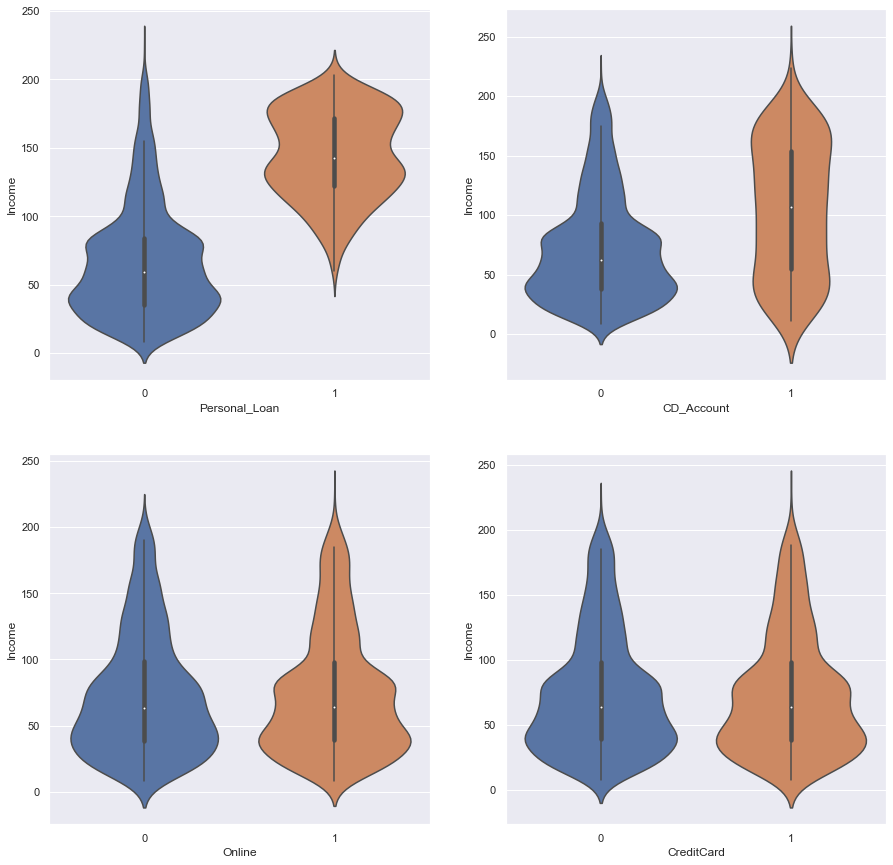

In [472]:
sns.set()
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.violinplot(y='Income', x='Personal_Loan', data=cust_data, split=True, ax=axes[0,0])
sns.violinplot(y='Income', x='CD_Account', data=cust_data, split=True, ax=axes[0,1])
sns.violinplot(y='Income', x='Online', data=cust_data, split=True, ax=axes[1,0])
sns.violinplot(y='Income', x='CreditCard', data=cust_data, split=True, ax=axes[1,1])

<AxesSubplot:xlabel='Age', ylabel='Income'>

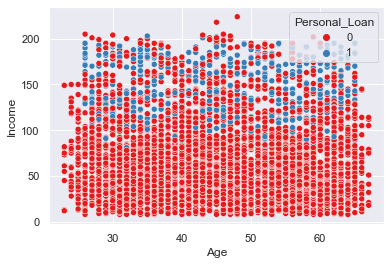

In [473]:
sns.scatterplot(cust_data['Age'], cust_data['Income'], hue=cust_data['Personal_Loan'], palette='Set1') 

<AxesSubplot:xlabel='Age', ylabel='Experience'>

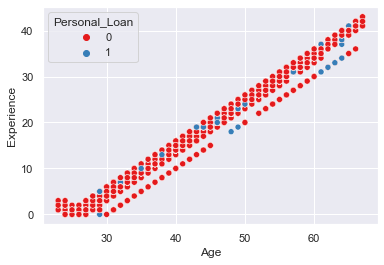

In [474]:
sns.scatterplot(cust_data['Age'], cust_data['Experience'], hue=cust_data['Personal_Loan'], palette='Set1') 

<AxesSubplot:xlabel='Income', ylabel='Experience'>

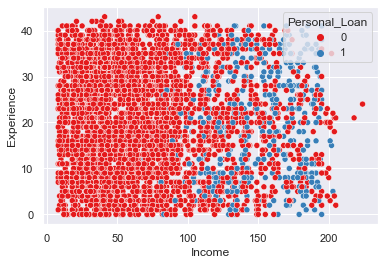

In [475]:
sns.scatterplot(cust_data['Income'], cust_data['Experience'], hue=cust_data['Personal_Loan'], palette='Set1') 

**Inference:**
* Age and Experience forms almost a straight line.
* Personal loan has been accepted to different age group customers.
* Only customers with Income more than 100 has likely get the personal loan.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  3. Perform correlation analysis among all the variables - you can use Pairplot and Correlation coefficients of every attribute with every other attribute

In [476]:
corr_data = cust_data.corr()

In [477]:
corr_data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.00000,0.99399,-0.05527,-0.02922,-0.04642,-0.05201,0.04133,-0.01254,-0.00773,-0.00044,0.00804,0.01370,0.00768
Experience,0.99399,1.00000,-0.04688,-0.02894,-0.05185,-0.04974,0.01392,-0.01110,-0.00830,-0.00099,0.00973,0.01405,0.00885
Income,-0.05527,-0.04688,1.00000,-0.01641,-0.15750,0.64598,-0.18752,0.20681,0.50246,-0.00262,0.16974,0.01421,-0.00239
ZIP Code,-0.02922,-0.02894,-0.01641,1.00000,0.01178,-0.00406,-0.01738,0.00738,0.00011,0.00470,0.01997,0.01699,0.00769
Family,-0.04642,-0.05185,-0.15750,0.01178,1.00000,-0.10927,0.06493,-0.02044,0.06137,0.01999,0.01411,0.01035,0.01159
CCAvg,-0.05201,-0.04974,0.64598,-0.00406,-0.10927,1.00000,-0.13612,0.10990,0.36689,0.01509,0.13653,-0.00361,-0.00669
Education,0.04133,0.01392,-0.18752,-0.01738,0.06493,-0.13612,1.00000,-0.03333,0.13672,-0.01081,0.01393,-0.01500,-0.01101
Mortgage,-0.01254,-0.01110,0.20681,0.00738,-0.02044,0.10990,-0.03333,1.00000,0.14210,-0.00541,0.08931,-0.00599,-0.00723
Personal_Loan,-0.00773,-0.00830,0.50246,0.00011,0.06137,0.36689,0.13672,0.14210,1.00000,0.02195,0.31635,0.00628,0.00280
Securities_Account,-0.00044,-0.00099,-0.00262,0.00470,0.01999,0.01509,-0.01081,-0.00541,0.02195,1.00000,0.31703,0.01263,-0.01503


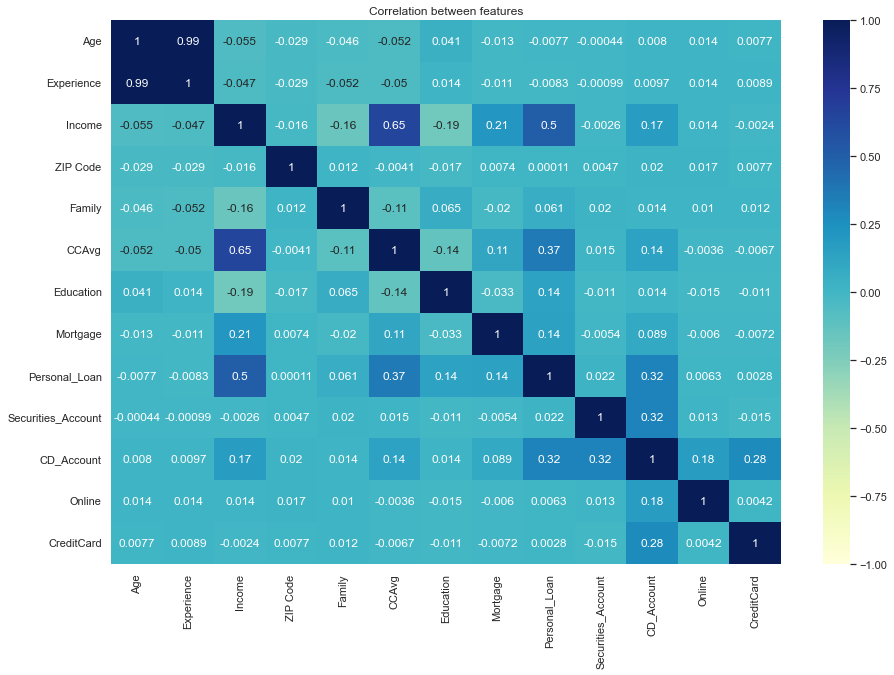

In [478]:
corr = cust_data.iloc[:, :13].corr() 
plt.figure(figsize=(15, 10))

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 12})

plt.title('Correlation between features')
plt.show()

**Inference:**
* Income and CCAvg is moderately correlated.
* Age and Experience is highly correlated

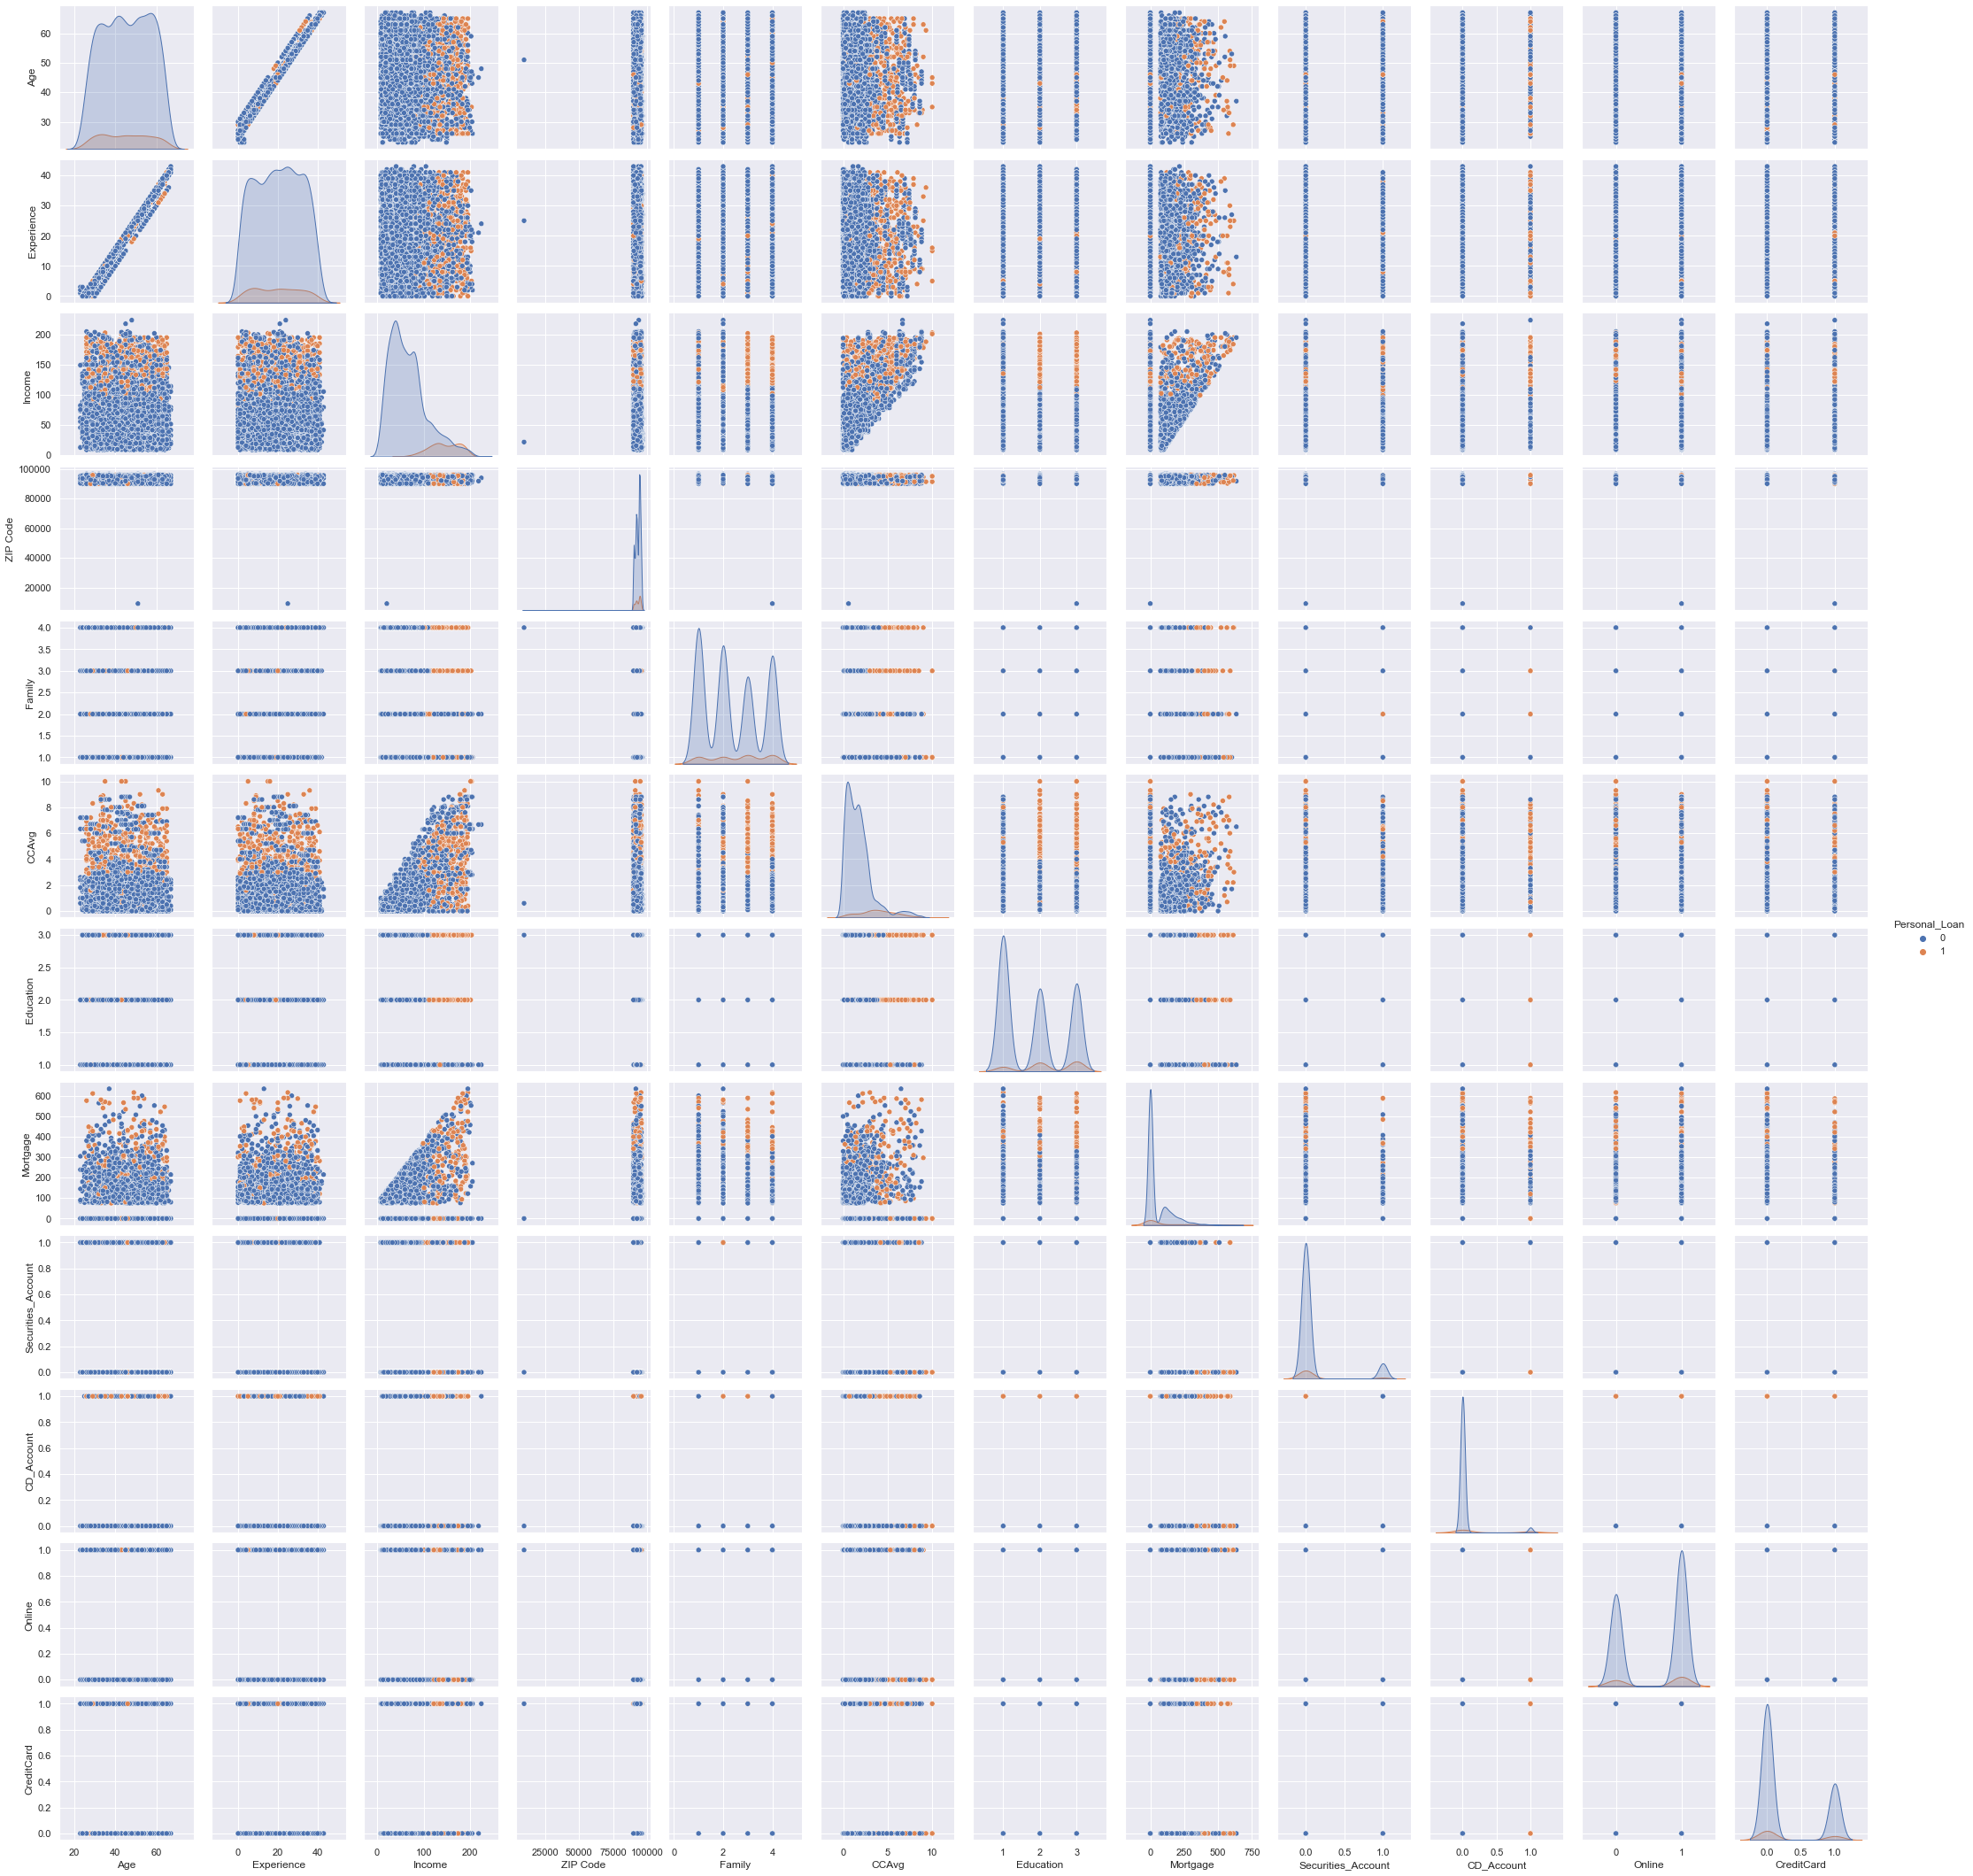

In [432]:
sns.pairplot(cust_data,hue="Personal_Loan");

**Inference:**
* The above plot show with experience and age have a positive correlation. As experience increase age also increases.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;">  Changing the datatype of attributes

In [479]:
cust_data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [480]:
cust_data.Education = cust_data.Education.astype('object')
cust_data.Personal_Loan = cust_data.Personal_Loan.astype('bool')
cust_data.Securities_Account = cust_data.Securities_Account.astype('bool')
cust_data.CD_Account = cust_data.CD_Account.astype('bool')
cust_data.Online = cust_data.Online.astype('bool')
cust_data.CreditCard = cust_data.CreditCard.astype('bool')

In [481]:
cust_data.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education              object
Mortgage                int64
Personal_Loan            bool
Securities_Account       bool
CD_Account               bool
Online                   bool
CreditCard               bool
dtype: object

**Inference:**
* As the Personal_Loan, Securities_Account, CD_Account, Online, CreditCard attributes are bool type attributes. Therefore, it has been converted into boolean datatype.
* Education attribute has been typecasted to object data type since it has different categories. 

In [482]:
cols_to_drop = ['ZIP Code','Experience']
cust_data = cust_data.drop(cols_to_drop, axis=1)

**Inference:**
* ZIP Code is irrelevant to the analysis as the correlation is less than 0.01 with most of the attributes.
* Experience attribute is highly correlated with age. Therefore, these columns are dropped from the dataframe for further analysis.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  4. One hot encode the Education variable

In [483]:
cust_data.describe(include=object)

,Education
count,5000
unique,3
top,1
freq,2096


In [484]:
print(cust_data['Education'].unique())
cust_data['Education'].value_counts()

[1 2 3]


1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [485]:
# Numerical attributes
cust_data_numeric_features = cust_data.select_dtypes(include=[np.number])
cust_data_numeric_features.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Mortgage'], dtype='object')

In [486]:
# Categorical attributes
cust_data_categorical_features = cust_data.select_dtypes(include=[np.object])
cust_data_categorical_features.columns

Index(['Education'], dtype='object')

In [487]:
for col in cust_data_categorical_features.columns.values:
    dummy_encoded_variables = pd.get_dummies(cust_data_categorical_features[col], prefix=col, drop_first=True)
    cust_data_categorical_features = pd.concat([cust_data_categorical_features, dummy_encoded_variables],axis=1)
    cust_data_categorical_features.drop([col], axis=1, inplace=True)

In [488]:
 # concats two dataframes
cust_data_dummy = pd.concat([cust_data_numeric_features, cust_data_categorical_features], axis=1)

In [489]:
cust_data_dummy.head() 

,Age,Income,Family,CCAvg,Mortgage,Education_2,Education_3
0,25,49,4,1.60000,0,0,0
1,45,34,3,1.50000,0,0,0
2,39,11,1,1.00000,0,0,0
3,35,100,1,2.70000,0,1,0
4,35,45,4,1.00000,0,1,0


**Inference:**
* One-Hot-Encoding helps us to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.
* Education attribute has different categories as 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* This function does One-Hot-Encoding on categorical text and convert the array into a dataframe. Specifically, one hot encoded dataframe

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  5. Separate the data into dependant and independent variables and create training and test sets out of them (X_train, y_train, X_test, y_test) 

In [490]:
# Independent vs target variable
y = cust_data['Personal_Loan']
X = cust_data[['Age','Income','Family','CCAvg','Education','Mortgage',
               'Securities_Account','CD_Account','Online','CreditCard']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=100)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  6. Use StandardScaler( ) from sklearn, to transform the training and test data into scaled values ( fit the StandardScaler object to the train data and transform train and test data using this object, making sure that the test set does not influence the values of the train set)  

* In StandardScaler method, we convert variables with different scales of measurements into a single scale which normalizes the data.

In [491]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sd = scaler.fit_transform(X_train)
X_test_sd = scaler.transform(X_test)


y_train.replace({0: 'Rejected the loan', 1:'Accepeted the loan'}, inplace=True)
y_test.replace({0: 'Rejected the loan', 1:'Accepeted the loan'}, inplace = True)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  7. Write a function which takes a model, X_train, X_test, y_train and y_test as input and returns the accuracy, recall, precision, specificity, f1_score of the model trained on the train set and evaluated on the test set 

In [492]:
def fit_n_print(model, X_train, X_test, y_train, y_test):
    
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    model.fit(X_train, y_train)
    
    test_accuracy = model.score(X_test, y_test)
    train_accuracy = model.score(X_train, y_train)
    
    pred = model.predict(X_test)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    specificity = recall_score(y_test, pred, pos_label=0)
    f1_score = f1_score(y_test, pred)
    
    return test_accuracy, train_accuracy, recall, precision, specificity, f1_score

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  8. Employ multiple Classification models (Logistic, K-NN, Naïve Bayes etc) and use the function from step 7 to train and get the metrics of the model 

In [493]:
knn_scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    knn_scores.append(NNH.score(X_test, y_test))

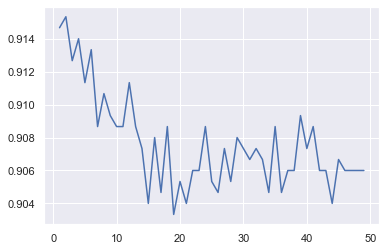

In [494]:
plt.plot(range(1,50),knn_scores)

* For KNN model iterate through some range of values and check the train and test score. 
* A Range of 0 to 20 for n_neighbors has been checked and to find the optimal value of k.
* From the above graph, the line is in its highest at the k=3

In [495]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

from sklearn.svm import SVC
SVM = SVC()

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3) 
# Therefore, optimal neighbours are used.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  9. Create a dataframe with the columns - “Model”, “accuracy”, “recall”, “precision”, “specificity”, “f1_score”. Populate the dataframe accordingly

In [496]:
result = pd.DataFrame(columns=['test_accuracy', 'train_accuracy', 'recall', 'precision', 'specificity','f1_score'])

for name, model in zip(['Logistic Regression', 'Naive Bayes', 'SVM','KNN'], [LR, NB, SVM, KNN]):
                       
    result.loc[name,:] = fit_n_print(model, X_train_sd, X_test_sd, y_train, y_test)

In [497]:
result

,test_accuracy,train_accuracy,recall,precision,specificity,f1_score
Logistic Regression,0.94267,0.95429,0.56329,0.83962,0.98733,0.67424
Naive Bayes,0.88400,0.88457,0.60759,0.46154,0.91654,0.52459
SVM,0.96467,0.98229,0.71519,0.93388,0.99404,0.81004
KNN,0.96067,0.98000,0.67089,0.93805,0.99478,0.78229


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  10. Give your reasoning on which is the best model in this case

* SVM is the best model as it has highest values in all columns except Precision, specificity.
* It gives 0.964 as output of accuracy. However, care should be taken while using accuracy as a metric because it gives biased results for data with unbalanced classes. 
* SVM is the best model among other models since the best value of these scores is 1. 
* Following SVM, KNN has second best and specificity, Precision values are better than the SVM model. In all other columns the values are nearer to SVM Model. 
* Following KNN, Logistic model has the third position compared to other model values.
* Naive Bayes is the worst model in this case. Even though it has 0.884 accuarcy but the precision is not even 50%. Therefore, it is not the best model among other ones. 